In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import datetime as dt
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
train

,datetime,total
0,01.01.2005 00:00:00,?
1,01.01.2005 01:00:00,154140
2,01.01.2005 02:00:00,157818
3,01.01.2005 03:00:00,149311
4,01.01.2005 04:00:00,138282
...,...,...
35059,31.12.2008 19:00:00,249376
35060,31.12.2008 20:00:00,246511
35061,31.12.2008 21:00:00,226469
35062,31.12.2008 22:00:00,199907


In [3]:
#time_format = "%d.%m.%Y %H:%M:%S"
#train["datetime"] = [dt.datetime.strptime(s, time_format) for s in train["datetime"]]
train["datetime"] = pd.to_datetime(train["datetime"])

In [4]:
train['month'] = pd.DatetimeIndex(train["datetime"]).month.astype(int)
train["weekDay"] = pd.DatetimeIndex(train["datetime"]).weekday.astype(int)
train["day"] = pd.DatetimeIndex(train["datetime"]).day.astype(int)

train["hour"] = [date.hour for date in train["datetime"]]
train["hour"].astype(int)
train['total'] = train['total']

In [5]:
train

,datetime,total,month,weekDay,day,hour
0,2005-01-01 00:00:00,?,1,5,1,0
1,2005-01-01 01:00:00,154140,1,5,1,1
2,2005-01-01 02:00:00,157818,1,5,1,2
3,2005-01-01 03:00:00,149311,1,5,1,3
4,2005-01-01 04:00:00,138282,1,5,1,4
...,...,...,...,...,...,...
35059,2008-12-31 19:00:00,249376,12,2,31,19
35060,2008-12-31 20:00:00,246511,12,2,31,20
35061,2008-12-31 21:00:00,226469,12,2,31,21
35062,2008-12-31 22:00:00,199907,12,2,31,22


In [6]:
#train.iloc(np.where(train["total"] == '?'))

In [7]:
# replace unknown and negative or zero consumtion with mean of such days of year (1 january, for examle)

for i in np.where(train['total']=='?')[0]:
    t = np.mean(list(map(float, train.loc[\
                (train['day'] == train['day'][i]) \
               & (train['month'] == train['month'][i])\
               & (train['hour'] == train['hour'][i])\
               & (train['total']!='?')]['total'])))
    
    train['total'][i] = t
    print(train['total'][i])
    #train['total'][i] = np.mean()
    
train['total'] = train['total'].astype(float)

for i in np.where(train['total']<=0)[0]:
    t = np.mean(list(map(float, train.loc[\
                (train['day'] == train['day'][i]) \
               & (train['month'] == train['month'][i])\
               & (train['hour'] == train['hour'][i])\
               & (train['total']>=0)]['total'])))
    
    train['total'][i] = t
    print(train['total'][i])

<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

132407.0
162286.33333333334
195110.0
194163.33333333334
183504.33333333334
183656.66666666666
189684.0
115266.66666666667
159892.0
220437.66666666666
164475.0
205782.0
163529.33333333334
125208.33333333333
192346.33333333334
194394.5
206610.0
202554.0
159871.0
124156.33333333333
204503.0
212404.0
208312.0
205814.0
205393.66666666666
239499.66666666666
216532.66666666666
203364.0
199875.0
196813.0


<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

193357.33333333334
205068.66666666666
199628.33333333334
222112.33333333334
221487.33333333334
194038.66666666666
192732.33333333334
229348.66666666666
224269.33333333334
173874.33333333334
209930.0
178066.0
138697.0
213036.0
214677.33333333334
134143.33333333334
231107.0
217642.66666666666
211785.33333333334
169110.0
221023.66666666666
172086.33333333334
238243.33333333334
239800.0
253730.0
241610.33333333334
220877.66666666666
222150.33333333334
216542.66666666666
201919.66666666666
195405.66666666666


<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

210092.66666666666
194394.5
164749.0
156156.66666666666
205499.33333333334
209377.66666666666
190513.66666666666
195591.33333333334
178739.0
182315.0
179391.33333333334
166507.33333333334
106301.0
166214.66666666666
161933.33333333334
129557.33333333333
174791.66666666666
174435.33333333334
157999.33333333334
184571.33333333334
191896.0
194802.66666666666
162774.66666666666
152949.0
192796.33333333334
187768.33333333334
196124.0
176931.33333333334
176647.0
198426.33333333334
156383.0
138598.66666666666
183553.33333333334
222555.0
217673.0
211894.33333333334
205367.0
153670.33333333334
210496.33333333334
221369.66666666666
226098.33333333334
170227.66666666666
108417.0
232413.66666666666
226836.0
213399.0
224298.0
231148.66666666666
222792.0
216158.0
217290.66666666666
118077.0
220605.66666666666
173526.0
210996.33333333334
205923.33333333334
199121.0
113266.66666666667


<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total'][i] = t
<ipython-input-7-9bca11cda920>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [8]:
train

,datetime,total,month,weekDay,day,hour
0,2005-01-01 00:00:00,132407.0,1,5,1,0
1,2005-01-01 01:00:00,154140.0,1,5,1,1
2,2005-01-01 02:00:00,157818.0,1,5,1,2
3,2005-01-01 03:00:00,149311.0,1,5,1,3
4,2005-01-01 04:00:00,138282.0,1,5,1,4
...,...,...,...,...,...,...
35059,2008-12-31 19:00:00,249376.0,12,2,31,19
35060,2008-12-31 20:00:00,246511.0,12,2,31,20
35061,2008-12-31 21:00:00,226469.0,12,2,31,21
35062,2008-12-31 22:00:00,199907.0,12,2,31,22


In [9]:
train.pop('datetime')

0       2005-01-01 00:00:00
1       2005-01-01 01:00:00
2       2005-01-01 02:00:00
3       2005-01-01 03:00:00
4       2005-01-01 04:00:00
                ...        
35059   2008-12-31 19:00:00
35060   2008-12-31 20:00:00
35061   2008-12-31 21:00:00
35062   2008-12-31 22:00:00
35063   2008-12-31 23:00:00
Name: datetime, Length: 35064, dtype: datetime64[ns]

In [10]:
train.groupby(by=["weekDay"], dropna=False).mean()

,total,month,day,hour
weekDay,,,,
0,186211.935805,6.502392,15.851675,11.5
1,185045.691753,6.483254,15.688995,11.5
2,185547.197601,6.511962,15.818182,11.5
3,185635.930622,6.519231,15.725962,11.5
4,184233.689503,6.552885,15.692308,11.5
5,183076.584131,6.559809,15.602871,11.5
6,186297.525851,6.531100,15.727273,11.5


In [11]:
x= sorted(train['weekDay'].unique())


In [12]:
train.corr()

,total,month,weekDay,day,hour
total,1.000000,-3.186819e-02,-7.835875e-03,6.237343e-03,6.752290e-01
month,-0.031868,1.000000e+00,5.804036e-03,1.052232e-02,-9.032585e-17
weekDay,-0.007836,5.804036e-03,1.000000e+00,-5.451783e-03,1.996039e-17
day,0.006237,1.052232e-02,-5.451783e-03,1.000000e+00,-5.444949e-17
hour,0.675229,-9.032585e-17,1.996039e-17,-5.444949e-17,1.000000e+00


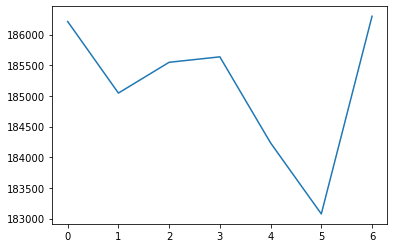

In [13]:
plt.plot(train.groupby(by=["weekDay"]).mean()['total'])

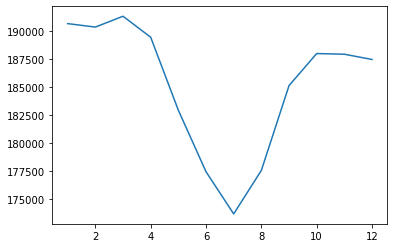

In [14]:
plt.plot(train.groupby(by=["month"]).mean()['total'])

[]

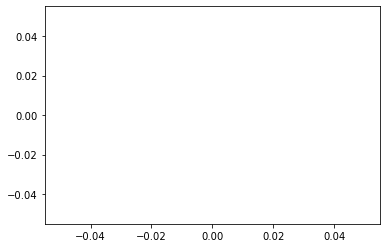

In [15]:
plt.plot()

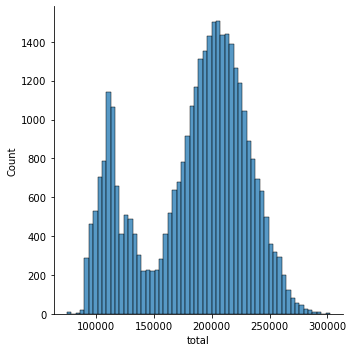

In [24]:
import seaborn as sns 

sns.displot(train['total']) 
plt.show() 

In [26]:
train['total'].loc[train['total']<90000]


2042     75000.0
7251     84718.0
9172     75000.0
15987    75000.0
20907    86282.0
21652    80590.0
24723    75000.0
28417    75000.0
28418    75000.0
29331    89789.0
29403    89742.0
29404    88815.0
29932    89507.0
29955    89669.0
30123    88899.0
30124    89992.0
30268    87706.0
30628    89186.0
30795    89247.0
31829    84494.0
31968    75000.0
33459    75000.0
33867    89767.0
34228    89815.0
Name: total, dtype: float64

In [27]:
train['total'].loc[train['total']<90000] = 90000

C:\Users\gleb\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
train['total'].loc[train['total']<=90000]

2042     90000.0
7251     90000.0
9172     90000.0
15987    90000.0
20907    90000.0
21652    90000.0
24723    90000.0
28417    90000.0
28418    90000.0
29331    90000.0
29403    90000.0
29404    90000.0
29932    90000.0
29955    90000.0
30123    90000.0
30124    90000.0
30268    90000.0
30628    90000.0
30795    90000.0
31829    90000.0
31968    90000.0
33459    90000.0
33867    90000.0
34228    90000.0
Name: total, dtype: float64

In [ ]:
test = train[20000:]
train = train[:20000]

In [30]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
test

In [1]:
#ar = AutoReg(train, lags=168).fit()
from fedot.api.main import Fedot# Tasks to solve
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams# Input data for fit and predict
from fedot.core.data.data import InputData# Train and test split
from fedot.core.data.data import train_test_data_setup

In [2]:
forecast_length = (35063-20000)
task = Task(TaskTypesEnum.ts_forecasting,
            TsForecastingParams(forecast_length=forecast_length))

In [3]:
# Load data from csv file and wrap it into InputData structure
input_data = InputData.from_csv_time_series(task, 'train.csv', target_column='total')# Divide into train and test
train_data, test_data = train_test_data_setup(input_data)

In [ ]:
# Init model for the time series forecasting
model = Fedot(problem='ts_forecasting',task_params=task.task_params)# Run AutoML model design
chain = model.fit(features=train_data)# Use model to obtain forecast
forecast = model.predict(features=test_data)

Composition started. Parameters tuning: True. Set of candidate models: ['linear', 'lasso', 'ridge', 'xgbreg', 'adareg', 'gbr', 'dtreg', 'treg', 'rfr', 'svr', 'sgdr', 'ar', 'scaling', 'normalization', 'simple_imputation', 'pca', 'poly_features', 'ransac_lin_reg', 'ransac_non_lin_reg', 'rfe_lin_reg', 'rfe_non_lin_reg', 'lagged', 'smoothing', 'gaussian_filter']. Composing time limit: 2 min
Model composition started


In [ ]:
answer = ar.predict(start=20000, end=35063, dynamic=False)

In [ ]:
with open("answer.txt", "w") as f:
    for v in answer:
        f.write(str(v))
        f.write('\n')